<a href="https://colab.research.google.com/github/Ashutosh-Singh-Thakur/Bharat-Intern-Internship/blob/main/Number-Recognition/Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST Handwritten Digit Classification

#### Import Required Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Loading the Data
#### We will use MNIST data which is in-built in keras api

In [2]:
(X_train, y_train),(X_validation, y_validation) = tf.keras.datasets.mnist.load_data()

#### Let's look at the dimentions of our data

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_validation.shape

(10000, 28, 28)

### Some data samples

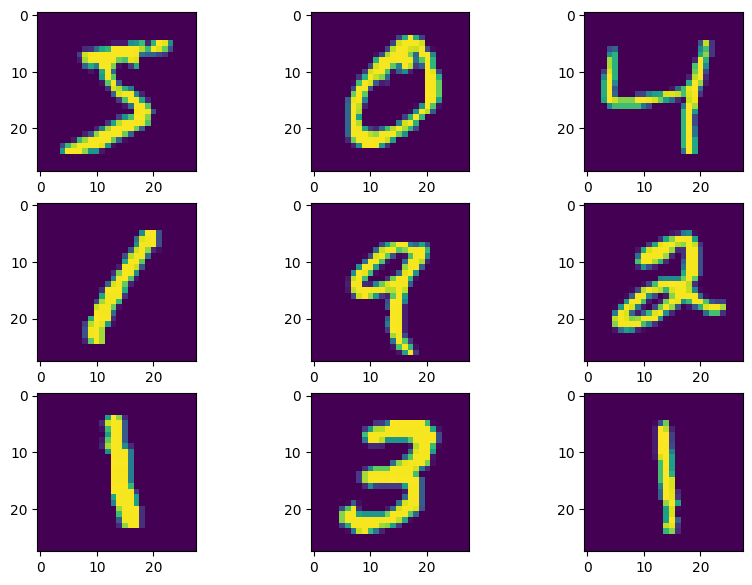

In [5]:
fig = plt.figure(figsize=(10,7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i])

### Normalizing the Data

In [6]:
X_train = X_train / 255
X_validation = X_validation / 255

### Deep Nural Network

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(X_train.shape[1],X_train.shape[2],1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    # 64 neuron hidden layer
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    # 10 output neuron, from 0 to 9
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer= 'adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

#### Summary of the Model

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 32)                346144    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 347114 (1.32 MB)
Trainable params: 347114 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

#### Callback to stop training when accuracy reaches a desired value

In [9]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            # Stop training once the above condition is met
            self.model.stop_training = True
callbacks = myCallback()

### Training our Model

In [10]:
history = model.fit(x = X_train,
                    y = y_train,
                    epochs=20,
                    verbose=1,
                    validation_data= (X_validation, y_validation),
                    callbacks=[callbacks])

Epoch 1/20
1875/1875 [==============================] - 21s 8ms/step - loss: 0.3315 - accuracy: 0.9337 - val_loss: 0.2029 - val_accuracy: 0.9701
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2128 - accuracy: 0.9645 - val_loss: 0.1920 - val_accuracy: 0.9689
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1867 - accuracy: 0.9685 - val_loss: 0.1661 - val_accuracy: 0.9718
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1685 - accuracy: 0.9717 - val_loss: 0.1699 - val_accuracy: 0.9697
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1572 - accuracy: 0.9735 - val_loss: 0.1471 - val_accuracy: 0.9750
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1472 - accuracy: 0.9754 - val_loss: 0.1318 - val_accuracy: 0.9776
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1392 - accuracy: 0.9766 - val_loss: 0.1438 - val_accuracy

### Retrieve a list of list results on training and validation data

In [11]:
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1) # Get number of epochs

### Visualizing the model Training and Validation Accuracy & Training and Validation Loss

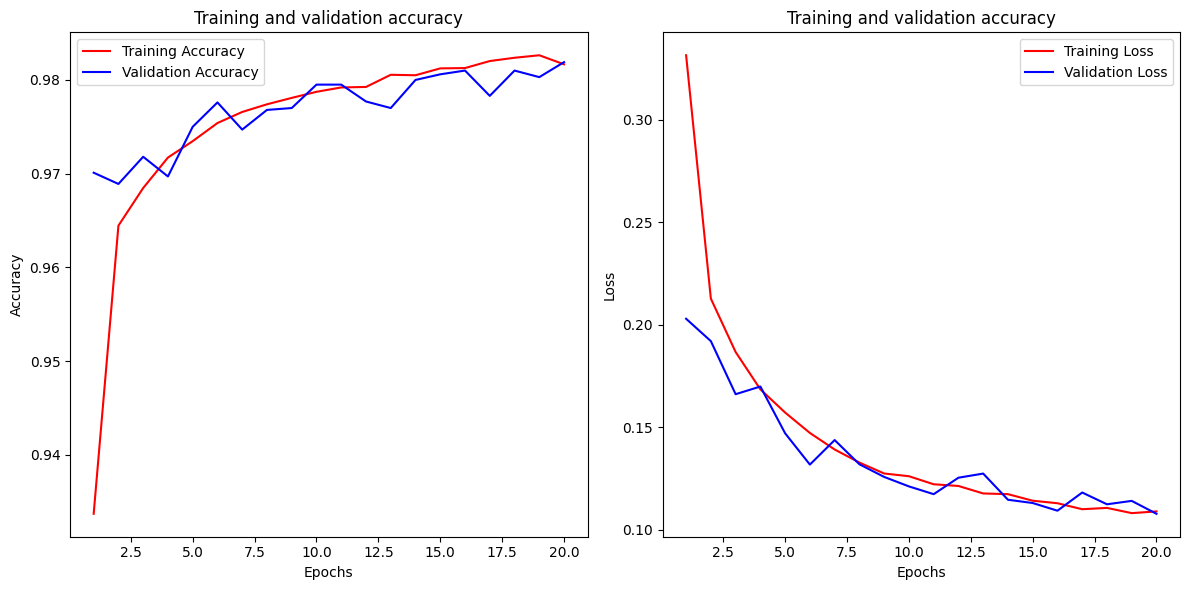

In [18]:
plt.figure(figsize=(12, 6))
# Plot training and validation accuracy per epoch
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(["Training Accuracy","Validation Accuracy"])

# Plot training and validation loss per epoch
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Training Loss","Validation Loss"])

plt.tight_layout()
plt.show()

#### With each epoch we observe

*   The accuracy of Training & Validation are following around value of 98%.
*   The training and validation losses are decreasing and following same value of 0.011.



### Model Evaluation

In [13]:
y_probs = model.predict(X_validation)
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [14]:
from sklearn.metrics import confusion_matrix
import itertools

cnf_matrix = confusion_matrix(y_validation,y_preds)
cnf_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

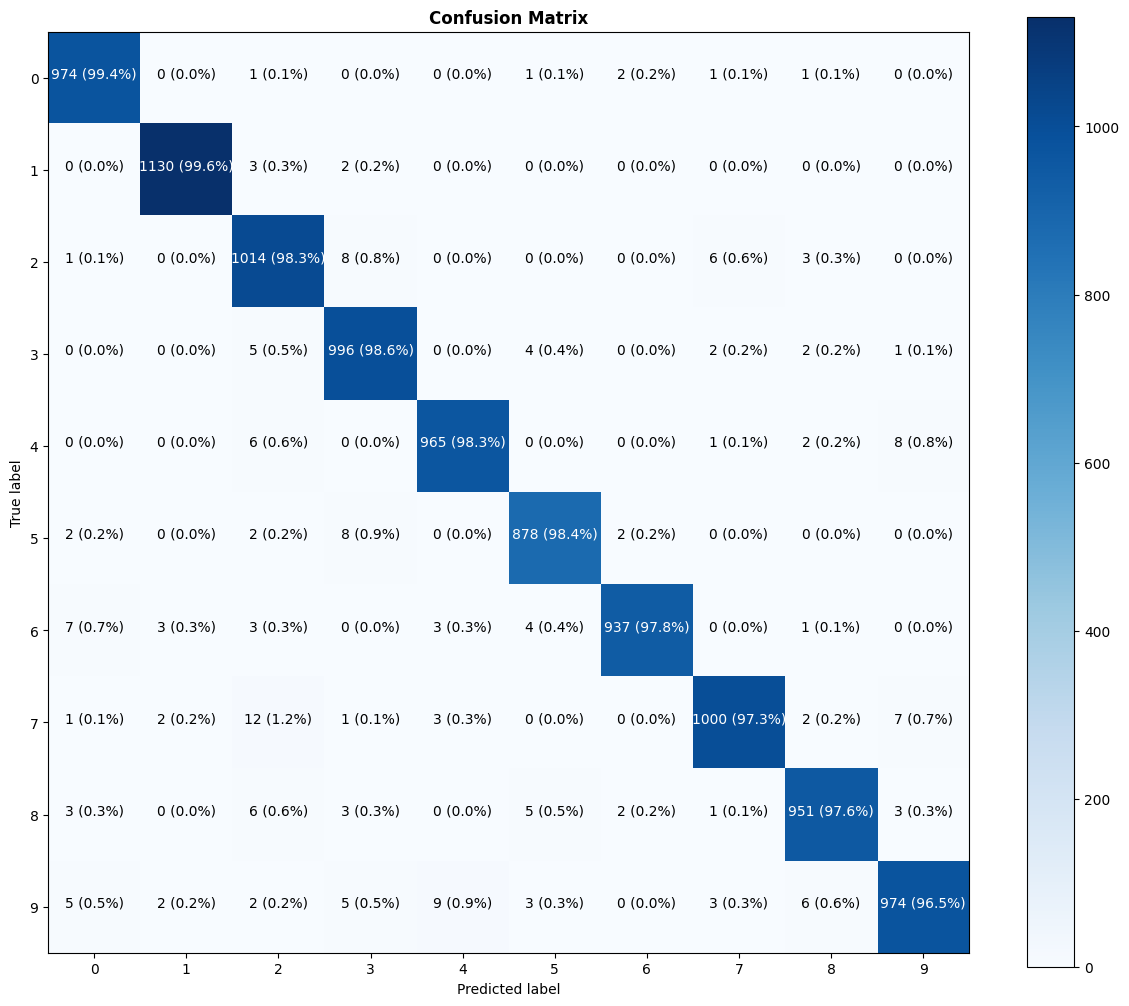

In [15]:
plt.figure(figsize = (12,10))
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix", fontweight = 'bold')
plt.colorbar()
classes = range(10)
tick_marks = np.arange(10)
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(classes, classes):
    plt.text(j, i,
             f"{cnf_matrix[i,j]} ({cnf_norm[i,j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > thresh else "black")
